In [11]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, PillowWriter
import math

In [12]:
def set_size(width, fraction=1):
    # Adjust the size of the plot
    fig_width_pt = width * fraction
    inches_per_pt = 1 / 72.27
    golden_ratio = (5**0.5 - 1) / 2
    fig_width_in = fig_width_pt * inches_per_pt
    fig_height_in = fig_width_in * golden_ratio
    fig_dim = (fig_width_in, fig_height_in)
    return fig_dim


# def plot_svc_decision_function(model, ax):
#     xlim = ax.get_xlim()
#     ylim = ax.get_ylim()
#     x = np.linspace(xlim[0], xlim[1], 30)
#     y = np.linspace(ylim[0], ylim[1], 30)
#     Y, X = np.meshgrid(y, x)
#     xy = np.vstack([X.ravel(), Y.ravel()]).T
#     P = model.decision_function(xy).reshape(X.shape)
#     ax.contour(
#         X, Y, P, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
#     )
#     ax.set_xlim(xlim)
#     ax.set_ylim(ylim)

In [13]:
def query(t):
    if t == 1:
        return -0.5
    elif t % 2 == 0:
        return 1
    else:
        return -1


def predict(t, z, eta):
    if t == 1:
        return 0
    else:
        sum = 0
        for i in range(1, t):
            sum += z[i] * eta
        return -sum

C:\Users\lenovo\AppData\Local\Temp\ipykernel_39956\1938884701.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}", r"\usepackage{bf}"]


0.8944271909999159


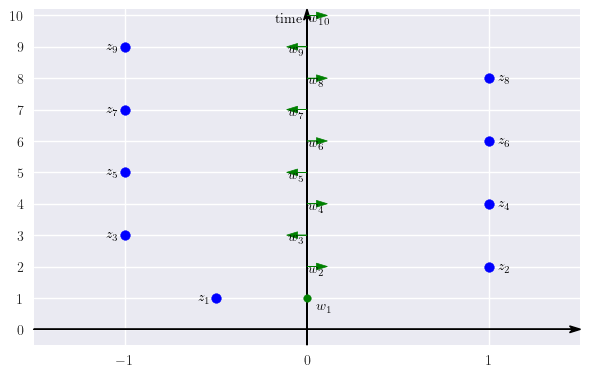

In [14]:
plt.style.use("seaborn")
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}", r"\usepackage{bf}"]

width = 600
eta = 1 / math.sqrt(20)
fig, ax = plt.subplots(1, 1, figsize=set_size(width, 0.85))
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-0.5, 10.2])
# removing the default axis on all sides:
for side in ["bottom", "right", "top", "left"]:
    ax.spines[side].set_visible(False)
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.locator_params(nbins=4, axis="x")
ax.locator_params(nbins=12, axis="y")
# manual arrowhead width and length
hw = 1.0 / 50.0 * (ymax - ymin)
hl = 1.0 / 50.0 * (xmax - xmin)
dps = fig.dpi_scale_trans.inverted()
bbox = ax.get_window_extent().transformed(dps)
width, height = bbox.width, bbox.height
yhw = hw / (ymax - ymin) * (xmax - xmin) * height / width
yhl = hl / (xmax - xmin) * (ymax - ymin) * width / height
lw = 1.0  # axis line width
ohg = 0.3  # arrow overhang
ax.arrow(
    xmin,
    0,
    xmax - xmin,
    0.0,
    fc="k",
    ec="k",
    lw=lw,
    head_width=hw,
    head_length=hl,
    overhang=ohg,
    length_includes_head=True,
    clip_on=False,
)

ax.arrow(
    0,
    ymin,
    0.0,
    ymax - ymin,
    fc="k",
    ec="k",
    lw=lw,
    head_width=yhw,
    head_length=yhl,
    overhang=ohg,
    length_includes_head=True,
    clip_on=False,
)
z = [0]
ax.scatter(0, 1, s=30, c="g")
ax.text(
    predict(1, z, eta) + 0.05,
    1 - 0.4,
    r"$w_{i}$".replace("i", str(1)),
    color="k",
    fontsize=10,
)

loss = 0
# FTRL algorithm
for i in range(1, 10):
    w = predict(i, z, eta)
    z.append(query(i))
    loss += w * z[i]
    ax.scatter(z[i], i, c="b")
    if query(i) == 1:
        ax.text(
            query(i) + 0.05,
            i - 0.1,
            r"$z_{i}$".replace("i", str(i)),
            color="k",
            fontsize=10,
        )
    else:
        ax.text(
            query(i) - 0.10,
            i - 0.1,
            r"$z_{i}$".replace("i", str(i)),
            color="k",
            fontsize=10,
        )
    ax.arrow(
        0,
        i + 1,
        predict(i + 1, z, eta),
        0,
        color="g",
        linewidth=0.5,
        head_width=hw,
        head_length=hl,
        length_includes_head=True,
    )
    if predict(i + 1, z, eta) == 1:
        ax.text(
            predict(i + 1, z, eta) / 2,
            i + 1 - 0.2,
            r"$w_{i}$".replace("i", str(i + 1)),
            color="k",
            fontsize=10,
        )
    else:
        ax.text(
            (predict(i + 1, z, eta) - 0.1) / 2,
            i + 1 - 0.2,
            r"$w_{i}$".replace("i", str(i + 1)),
            color="k",
            fontsize=10,
        )

ax.text(-0.175, 9.8, r"time", color="k", fontsize=10)
print(loss)
plt.show()

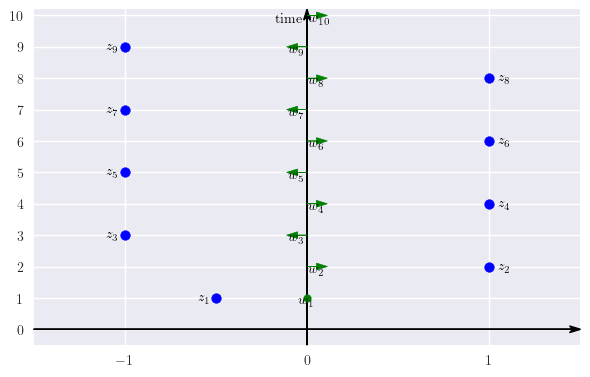

In [15]:
width = 600

fig, ax = plt.subplots(figsize=set_size(width, 0.85))
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-0.5, 10.2])
# removing the default axis on all sides:
for side in ["bottom", "right", "top", "left"]:
    ax.spines[side].set_visible(False)
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.locator_params(nbins=4, axis="x")
ax.locator_params(nbins=12, axis="y")
# manual arrowhead width and length
hw = 1.0 / 50.0 * (ymax - ymin)
hl = 1.0 / 50.0 * (xmax - xmin)
dps = fig.dpi_scale_trans.inverted()
bbox = ax.get_window_extent().transformed(dps)
width, height = bbox.width, bbox.height
yhw = hw / (ymax - ymin) * (xmax - xmin) * height / width
yhl = hl / (xmax - xmin) * (ymax - ymin) * width / height
lw = 1.0  # axis line width
ohg = 0.3  # arrow overhang
ax.arrow(
    xmin,
    0,
    xmax - xmin,
    0.0,
    fc="k",
    ec="k",
    lw=lw,
    head_width=hw,
    head_length=hl,
    overhang=ohg,
    length_includes_head=True,
    clip_on=False,
)

ax.arrow(
    0,
    ymin,
    0.0,
    ymax - ymin,
    fc="k",
    ec="k",
    lw=lw,
    head_width=yhw,
    head_length=yhl,
    overhang=ohg,
    length_includes_head=True,
    clip_on=False,
)


def init():
    ax.scatter(0, 1, s=30, c="g")
    ax.text(-0.175, 9.8, r"time", color="k", fontsize=10)


def run(i):
    if i % 2 == 1:
        i = i // 2 + 1
        ax.scatter(z[i], i, c="b")
        if query(i) == 1:
            ax.text(
                query(i) + 0.05,
                i - 0.1,
                r"$z_{i}$".replace("i", str(i)),
                color="k",
                fontsize=10,
            )
        else:
            ax.text(
                query(i) - 0.10,
                i - 0.1,
                r"$z_{i}$".replace("i", str(i)),
                color="k",
                fontsize=10,
            )
    else:
        i = i // 2
        ax.arrow(
            0,
            i + 1,
            predict(i + 1, z, eta),
            0,
            color="g",
            linewidth=0.5,
            head_width=hw,
            head_length=hl,
            length_includes_head=True,
        )
        if predict(i + 1, z, eta) == 1:
            ax.text(
                predict(i + 1, z, eta) / 2,
                i + 1 - 0.2,
                r"$w_{i}$".replace("i", str(i + 1)),
                color="k",
                fontsize=10,
            )
        else:
            ax.text(
                (predict(i + 1, z, eta) - 0.1) / 2,
                i + 1 - 0.2,
                r"$w_{i}$".replace("i", str(i + 1)),
                color="k",
                fontsize=10,
            )


class NoLoopPillowWriter(animation.PillowWriter):  # Inherit PillowWriter
    def finish(self):
        self._frames[0].save(
            self.outfile,
            save_all=True,
            append_images=self._frames[1:],
            duration=int(1000 / self.fps),
        )  # Not having 'loop' will run seq only once


ani = animation.FuncAnimation(
    fig, run, frames=19, interval=500, repeat=False, init_func=init
)
ani.save("FTRL_demo.gif", dpi=200, writer=NoLoopPillowWriter(fps=5))
plt.show()